In [159]:
# Imports
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten,  BatchNormalization

In [160]:
# Load the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.shape, test.shape

((42000, 785), (28000, 784))

In [161]:
# Split the data in X and y
X = train.drop(['label'], axis=1)
y = train['label']

In [162]:
# Normalize the pixel value
X = X / 255

In [163]:
# Reshape
X_reshape = X.values
X_reshape = X_reshape.reshape(-1, 28, 28, 1)

In [164]:
# One-hot-Encode the labels
y_ohe = to_categorical(y)

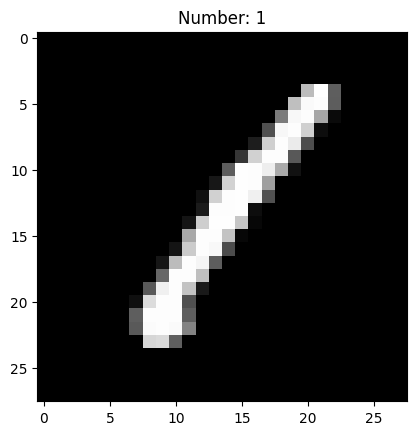

In [165]:
# Show the first image
plt.imshow(X_reshape[0], cmap='gray')
plt.title('Number: '+ str(y[0]))
plt.show()

In [166]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_ohe, test_size = 0.2, random_state = 42)

X_train.shape

(33600, 28, 28, 1)

In [167]:
# Making the model
cnn_model_1 = Sequential()
cnn_model_1.add(Conv2D(filters = 28, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
cnn_model_1.add(MaxPooling2D((2,2)))
cnn_model_1.add(Conv2D(filters = 56, kernel_size = (3,3), activation="relu"))
cnn_model_1.add(MaxPooling2D((2,2)))
cnn_model_1.add(Conv2D(filters = 56, kernel_size = (3,3), activation="relu"))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(56, activation="relu"))
cnn_model_1.add(Dense(10, activation="softmax"))

In [168]:
# Compile the model
cnn_model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [169]:
# Fitting the model
history = cnn_model_1.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
263/263 [==============================] - 13s 48ms/step - loss: 0.3875 - accuracy: 0.8856 - val_loss: 0.1185 - val_accuracy: 0.9636
Epoch 2/10
263/263 [==============================] - 14s 55ms/step - loss: 0.0967 - accuracy: 0.9695 - val_loss: 0.0905 - val_accuracy: 0.9724
Epoch 3/10
263/263 [==============================] - 14s 54ms/step - loss: 0.0657 - accuracy: 0.9792 - val_loss: 0.0748 - val_accuracy: 0.9770
Epoch 4/10
263/263 [==============================] - 14s 54ms/step - loss: 0.0513 - accuracy: 0.9834 - val_loss: 0.0519 - val_accuracy: 0.9836
Epoch 5/10
263/263 [==============================] - 13s 51ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0603 - val_accuracy: 0.9810
Epoch 6/10
263/263 [==============================] - 13s 51ms/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0516 - val_accuracy: 0.9849
Epoch 7/10
263/263 [==============================] - 14s 52ms/step - loss: 0.0297 - accuracy: 0.9900 - val_loss: 0.0475 - val_accuracy:

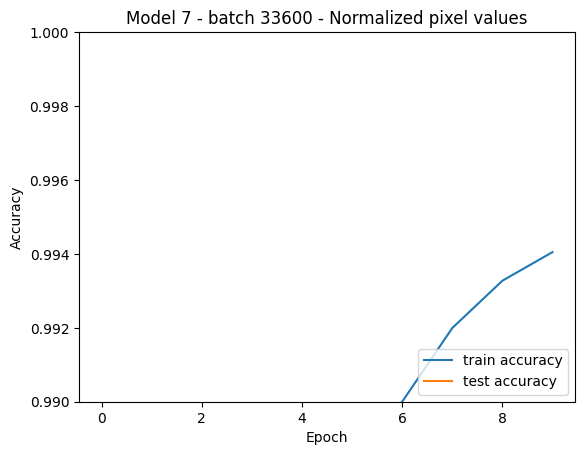

In [170]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.title('Model 7 - batch 33600 - Normalized pixel values')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.99, 1])
plt.legend(loc='lower right')